In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,X1,X2,Y
0,51,51,1
1,19,6,0
2,63,71,1
3,17,29,1
4,70,41,0
5,76,34,0
6,11,19,1
7,64,93,1
8,12,52,1
9,8,77,1


In [4]:
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
print(X1)
print(X2)
print(Y)

[51, 19, 63, 17, 70, 76, 11, 64, 12, 8, 32, 20, 85, 8, 71, 48, 57, 45, 63, 92, 81, 95, 6, 51, 84, 99, 34, 40, 92, 13, 42, 45, 29, 84, 44, 48, 78, 35, 34, 86, 65, 9, 39, 31, 53, 68, 43, 13, 76]
[51, 6, 71, 29, 41, 34, 19, 93, 52, 77, 16, 68, 63, 55, 5, 49, 65, 9, 25, 51, 79, 29, 3, 95, 75, 83, 61, 30, 17, 100, 90, 48, 12, 70, 75, 70, 91, 44, 91, 74, 12, 3, 15, 0, 63, 21, 45, 59, 51]
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]


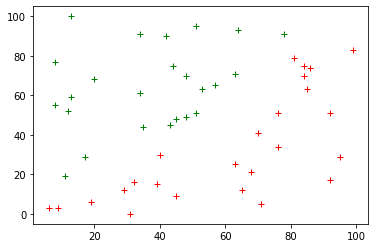

In [5]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

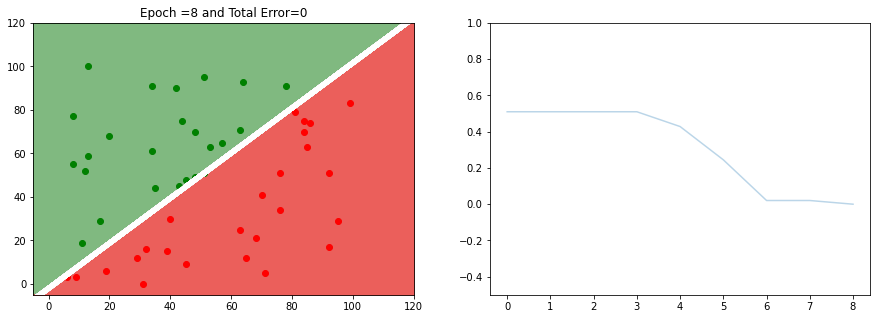

Epoch: 8 Loss: 0.0 and y=[-7.220839212990583, 122.43505617241576] and x=1.9615415399415552


In [7]:
W=[random.random(), random.random()]
b=random.random()
lr=0.0001

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(15,5))
    
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='g',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#F05F5F',alpha=.4)
        #plt.fill_between(x=[-5,120],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 15, 4)
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1